In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

In [2]:
def f(x):
    return np.sin(x)

In [24]:
class SystemSolver:
    def __init__(self):
        self.arr = []
        self.declarations = set()
        
    def add(self, s):
        var, res = s.split('=')
        var = var.split(',')
        vector = []
        
        for substr in var:
            index = 0
            while not substr[index].isalpha():
                index += 1
            vector.append((float(substr[:index]), substr[index:]) )
            self.declarations.add(substr[index:]) 
            
        self.arr.append( (vector, float(res)) )
                          
        print(self.arr)
        
    def solve(self):
        decl =  {item : index for index, item in enumerate(self.declarations)} 
        #print(decl)
        #print(decl)
        #for l in self.arr:
        #    print(l)

        if len(decl) != len(self.arr):
            print('decl={}, arr={}'.format(len(decl), len(self.arr)))
            print('Ошибочное число уравнений')
            return
        
        
        
        b = np.zeros((len(decl), 1))
        A = np.zeros((len(decl), len(decl)))
        
        for i, line in enumerate(self.arr):
            vector, res = line[0], line[1]
            b[i] = res
            for q in vector:
                A[i][decl[q[1]]] = q[0]
        A = np.matrix(A)
        return np.array((A.I * b).T), decl
            
        
        

knots: [ 0.          6.28318531]
[([(0.0, 'a1'), (0.0, 'b1'), (0.0, 'c1'), (1.0, 'd1')], 0.0)]
[([(0.0, 'a1'), (0.0, 'b1'), (0.0, 'c1'), (1.0, 'd1')], 0.0), ([(248.05021344239853, 'a1'), (39.47841760435743, 'b1'), (6.283185307179586, 'c1'), (1.0, 'd1')], -2.4492935982947064e-16)]
[([(0.0, 'a1'), (0.0, 'b1'), (0.0, 'c1'), (1.0, 'd1')], 0.0), ([(248.05021344239853, 'a1'), (39.47841760435743, 'b1'), (6.283185307179586, 'c1'), (1.0, 'd1')], -2.4492935982947064e-16), ([(0.0, 'a1'), (0.0, 'b1'), (1.0, 'c1')], 1.0)]
[([(0.0, 'a1'), (0.0, 'b1'), (0.0, 'c1'), (1.0, 'd1')], 0.0), ([(248.05021344239853, 'a1'), (39.47841760435743, 'b1'), (6.283185307179586, 'c1'), (1.0, 'd1')], -2.4492935982947064e-16), ([(0.0, 'a1'), (0.0, 'b1'), (1.0, 'c1')], 1.0), ([(118.4352528130723, 'a1'), (12.566370614359172, 'b1'), (1.0, 'c1')], 1.0)]
[[ 0.          1.          0.05066059 -0.47746483]]
{'d1': 0, 'c1': 1, 'a1': 2, 'b1': 3}


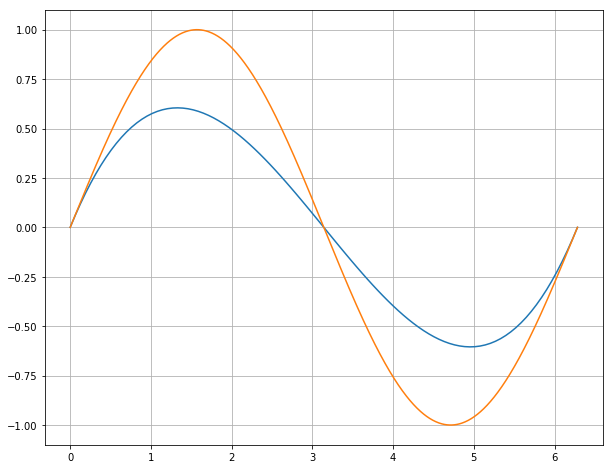

In [25]:
N = 2

knots = np.array(np.linspace(0, 2 * np.pi, N))
print("knots:", knots)

# ax^3 + bx^2+cx+d

arr = np.zeros((4 * (N - 1), 4 * (N - 1)))
b = np.zeros((4 * (N - 1), 1))

# 1 .. N - 1
# непрерывность, 1, 2 производные, значение
s = '{}a{},{}b{},{}c{},{}d{}={}'
s1 = '{}a{},{}b{},{}c{},{}a{},{}b{},{}c{}=0'
s2 = '{}a{},{}b{},{}a{},{}b{}=0'
solv = SystemSolver()

for i in range(1, N - 1):
    x1 = knots[i]
    x2 + x1 ** 2
    x3 = x1 ** 3
    
    # Значение в точке слева
    de = s.format(x3, i, x2, i, x1, i, 1, i, f(x1))
    solv.add(de)
    
    # справа
    de = s.format(x3, i + 1, x2, i + 1, x1, i + 1, 1, i + 1, f(x1))
    solv.add(de)
    
    # равенство производных
    de = s1.format(3 * x2, i, 2 * x1, i, 1, i, -3 * x2, i + 1, -2 * x1, i + 1, -1, i + 1)
    solv.add(de)
    
    # Равенство 2 производных
    de = s2.format(6 * x1, i, 2, i, -6 * x1, i + 1, -2, i + 1)
    solv.add(de)
    

x1 = knots[0]
x2 = x1 ** 2
x3 = x1 ** 3

de = s.format(x3, 1, x2, 1, x1, 1, 1, 1, f(x1))
solv.add(de)

x1 = knots[len(knots) - 1]
x2 = x1 ** 2
x3 = x1 ** 3

de = s.format(x3, len(knots) - 1, x2, len(knots) - 1, x1, len(knots) - 1, 1, len(knots) - 1, f(x1))
solv.add(de)


x1 = knots[0]
x2 = x1 ** 2

de = '{}a{},{}b{},{}c{}=1'.format(3 * x2, 1, 2 * x1, 1, 1, 1)
solv.add(de)

x1 = knots[len(knots) - 1]
x2 = x1 ** 2

de = '{}a{},{}b{},{}c{}=1'.format(3 * x2, len(knots) - 1, 2 * x1, 1, len(knots) - 1, 1)
solv.add(de)

A, decl = solv.solve()
print(A)
print(decl)

poly = []


for i in range(1, N):
    arr = [ A[0][decl['{}{}'.format(y, i)]] for y in ['d', 'c', 'b', 'a'] ]
    p = np.polynomial.Polynomial(arr)
    l = np.linspace(knots[i - 1], knots[i], 100)
    plt.plot(l, p(l))

plt.grid()
    
ll = np.linspace(knots[0], knots[-1], 1000)
plt.plot(ll, np.sin(ll))
    
